<h2>Getting data</h2>

In [1]:
data_dir = "../../data_ml_2020/cat_dog_data"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from PIL import Image
from keras import preprocessing

In [3]:
import os
cwd = os.getcwd()
os.chdir(cwd)
print(os.listdir(data_dir))

['.DS_Store', 'random_test_set', 'training_set', 'test_set']


In [4]:
train_cats_files = []
train_path_cats = data_dir +"/training_set/cats/"
for path in os.listdir(train_path_cats):
    if '.jpg' in path:
        train_cats_files.append(os.path.join(train_path_cats, path))
        

        
train_dogs_files = []
train_path_dogs = data_dir +"/training_set/dogs/"
for path in os.listdir(train_path_dogs):
    if '.jpg' in path:
        train_dogs_files.append(os.path.join(train_path_dogs, path))
        
len(train_cats_files), len(train_dogs_files)

(4000, 4000)

In [5]:
k = 200
sample_dog_file = train_dogs_files[k]
img = preprocessing.image.load_img(sample_dog_file, target_size=(64, 64))
img_array = preprocessing.image.img_to_array(img)

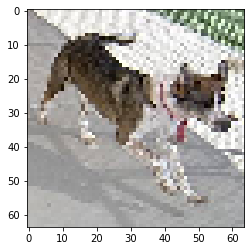

In [6]:
plt.imshow(np.uint8(img_array))

In [7]:
img_array.shape
# print(img_array)

(64, 64, 3)

In [8]:
# image dimensions: using 32x32 pixels just for speed
d = 32
X_train_orig = np.zeros((8000, d, d, 3), dtype='float32')
for i in range(4000):    
    path = train_cats_files[i]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    X_train_orig[i] = preprocessing.image.img_to_array(img)

for i in range(4000,8000):    
    path = train_dogs_files[i-4000]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    X_train_orig[i] = preprocessing.image.img_to_array(img)    

X_train_orig.shape

(8000, 32, 32, 3)

In [9]:
# normalize training data
X_train = X_train_orig / 255.0
X_train

array([[[[0.14901961, 0.10980392, 0.07450981],
         [0.13333334, 0.10588235, 0.06666667],
         [0.14117648, 0.10196079, 0.06666667],
         ...,
         [0.40392157, 0.23137255, 0.1254902 ],
         [0.42745098, 0.27058825, 0.17254902],
         [0.4117647 , 0.2784314 , 0.17254902]],

        [[0.13725491, 0.09803922, 0.0627451 ],
         [0.16078432, 0.12156863, 0.08627451],
         [0.16078432, 0.11372549, 0.12156863],
         ...,
         [0.4392157 , 0.2784314 , 0.2       ],
         [0.41960785, 0.28627452, 0.18039216],
         [0.42745098, 0.30980393, 0.21568628]],

        [[0.14509805, 0.10588235, 0.07058824],
         [0.16862746, 0.12941177, 0.09411765],
         [0.7607843 , 0.7176471 , 0.7411765 ],
         ...,
         [0.43137255, 0.29411766, 0.1764706 ],
         [0.42745098, 0.3019608 , 0.21176471],
         [0.42745098, 0.30980393, 0.21568628]],

        ...,

        [[0.3372549 , 0.27058825, 0.20784314],
         [0.3647059 , 0.30588236, 0.23137255]

In [10]:
# class labels for train data

Y_train_orig = np.ones((4000,)) # 1 - 4000 are cat pictures so our label is 1
Y_train_orig = np.concatenate((Y_train_orig, np.zeros((4000,)))) # 4000 - 8000 are dog pictures so our label is 0

print(Y_train_orig)

Y_train = Y_train_orig.reshape(-1)
print(Y_train)
print("At position 3 should be a cat:", Y_train[3])
print("At position 4002 should be a dog:", Y_train[4002])
Y_train.shape

[1. 1. 1. ... 0. 0. 0.]
[1. 1. 1. ... 0. 0. 0.]
At position 3 should be a cat: 1.0
At position 4002 should be a dog: 0.0


(8000,)

For test set

In [11]:
test_cats_files = []
test_path_cats = data_dir +"/test_set/cats/"
for path in os.listdir(test_path_cats):
    if '.jpg' in path:
        test_cats_files.append(os.path.join(test_path_cats, path))
        

test_dogs_files = []
test_path_dogs = data_dir +"/test_set/dogs/"
for path in os.listdir(test_path_dogs):
    if '.jpg' in path:
        test_dogs_files.append(os.path.join(test_path_dogs, path))
        

len(test_cats_files), len(test_dogs_files)

(1000, 1000)

In [12]:
X_test_orig = np.zeros((2000, d, d, 3), dtype='float32')  

for i in range(1000):    
    path = test_cats_files[i]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    X_test_orig[i] = preprocessing.image.img_to_array(img)

for i in range(1000,2000):    
    path = test_dogs_files[i-1000]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    X_test_orig[i] = preprocessing.image.img_to_array(img)    


X_test_orig.shape

(2000, 32, 32, 3)

In [13]:
# normalize test data
X_test = X_test_orig / 255.0
X_test

array([[[[0.9254902 , 0.8901961 , 0.65882355],
         [1.        , 0.90588236, 0.6666667 ],
         [0.9647059 , 0.9490196 , 0.65882355],
         ...,
         [0.9647059 , 0.94509804, 0.6862745 ],
         [0.9647059 , 0.9490196 , 0.65882355],
         [0.9882353 , 0.9490196 , 0.7411765 ]],

        [[0.94509804, 0.9254902 , 0.69803923],
         [0.7137255 , 0.75686276, 0.7254902 ],
         [0.7764706 , 0.827451  , 0.7921569 ],
         ...,
         [0.93333334, 0.972549  , 0.9372549 ],
         [0.8862745 , 0.92941177, 0.8980392 ],
         [1.        , 0.99215686, 0.90588236]],

        [[0.9529412 , 0.93333334, 0.7058824 ],
         [0.75686276, 0.8       , 0.76862746],
         [0.75686276, 0.80784315, 0.77254903],
         ...,
         [0.99215686, 1.        , 0.9764706 ],
         [0.9607843 , 0.98039216, 0.95686275],
         [1.        , 0.99215686, 0.90588236]],

        ...,

        [[0.98039216, 0.92156863, 0.69803923],
         [0.5529412 , 0.35686275, 0.16470589]

In [14]:
# create class label for test set
Y_test_orig = np.ones((1000,)) # 1 - 1000 are cat so label = 1
Y_test_orig = np.concatenate((Y_test_orig, np.zeros((1000,)))) # 1000 - 2000 are dog so label = 0

Y_test = Y_test_orig.reshape(-1)
Y_test.shape



(2000,)

In [15]:
#from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
#Y_train = to_categorical(Y_train, num_classes=2)
#Y_test = to_categorical(Y_test, num_classes=2)

<h2>Building Model with CNN</h2>

In [461]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

<h2>Experiment 1</h2>

In [445]:

model = Sequential()
#

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', 
                 activation ='relu', input_shape = (d,d,3)))

model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))



#


# fully connected
model.add(Flatten())

model.add(Dense(32, activation = "relu"))

model.add(Dense(1, activation = "sigmoid"))


# Define the optimizer
# lr = learning rate
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

epochs = 10  # for better result increase the epochs
batch_size = 32

# Fit the model
history = model.fit(X_train, Y_train, epochs = epochs, validation_data = (X_test,Y_test), batch_size=batch_size)

Epoch 1/10
250/250 [==============================] - 2s 10ms/step - loss: 0.6838 - accuracy: 0.5589 - val_loss: 0.6652 - val_accuracy: 0.5840
Epoch 2/10
250/250 [==============================] - 2s 7ms/step - loss: 0.6350 - accuracy: 0.6430 - val_loss: 0.6566 - val_accuracy: 0.5995
Epoch 3/10
250/250 [==============================] - 2s 7ms/step - loss: 0.5809 - accuracy: 0.7009 - val_loss: 0.5913 - val_accuracy: 0.6900
Epoch 4/10
250/250 [==============================] - 2s 7ms/step - loss: 0.5472 - accuracy: 0.7222 - val_loss: 0.5656 - val_accuracy: 0.7175
Epoch 5/10
250/250 [==============================] - 2s 7ms/step - loss: 0.5250 - accuracy: 0.7420 - val_loss: 0.5806 - val_accuracy: 0.7040
Epoch 6/10
250/250 [==============================] - 2s 7ms/step - loss: 0.5017 - accuracy: 0.7555 - val_loss: 0.5590 - val_accuracy: 0.7185
Epoch 7/10
250/250 [==============================] - 2s 7ms/step - loss: 0.4849 - accuracy: 0.7655 - val_loss: 0.5950 - val_accuracy: 0.6965
Epoch

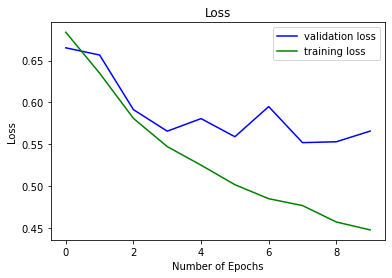

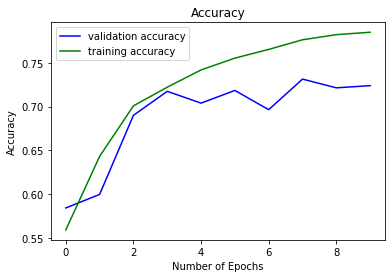

In [446]:
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.plot(history.history['loss'], color='g', label="training loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history.history['val_accuracy'], color='b', label="validation accuracy")
plt.plot(history.history['accuracy'], color='g', label="training accuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


<h2>Experiment 2</h2>

In [452]:

model_2 = Sequential()


model_2.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', 
                 activation ='relu', input_shape = (d,d,3)))

model_2.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', 
                 activation ='relu'))

model_2.add(MaxPool2D(pool_size=(2,2)))


model_2.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', 
                 activation ='relu'))
model_2.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', 
                 activation ='relu'))
model_2.add(MaxPool2D(pool_size=(2,2)))
model_2.add(Dropout(0.2))



# fully connected
model_2.add(Flatten())

model_2.add(Dense(32, activation = "relu"))

model_2.add(Dense(1, activation = "sigmoid"))


# Define the optimizer
# lr = learning rate
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model_2.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

epochs = 10  # for better result increase the epochs
batch_size = 64

# Fit the model
history_2 = model_2.fit(X_train, Y_train, epochs = epochs, validation_data = (X_test,Y_test), batch_size=batch_size)

Epoch 1/10
125/125 [==============================] - 15s 121ms/step - loss: 0.6914 - accuracy: 0.5203 - val_loss: 0.6901 - val_accuracy: 0.5520
Epoch 2/10
125/125 [==============================] - 15s 120ms/step - loss: 0.6496 - accuracy: 0.6089 - val_loss: 0.6017 - val_accuracy: 0.6850
Epoch 3/10
125/125 [==============================] - 13s 108ms/step - loss: 0.5967 - accuracy: 0.6755 - val_loss: 0.5939 - val_accuracy: 0.6830
Epoch 4/10
125/125 [==============================] - 13s 107ms/step - loss: 0.5738 - accuracy: 0.6992 - val_loss: 0.5406 - val_accuracy: 0.7290
Epoch 5/10
125/125 [==============================] - 13s 106ms/step - loss: 0.5188 - accuracy: 0.7456 - val_loss: 0.5143 - val_accuracy: 0.7530
Epoch 6/10
125/125 [==============================] - 14s 108ms/step - loss: 0.4761 - accuracy: 0.7739 - val_loss: 0.4761 - val_accuracy: 0.7705
Epoch 7/10
125/125 [==============================] - 14s 113ms/step - loss: 0.4480 - accuracy: 0.7928 - val_loss: 0.4796 - val_ac

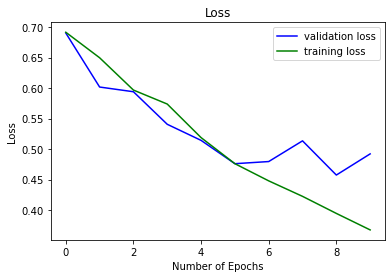

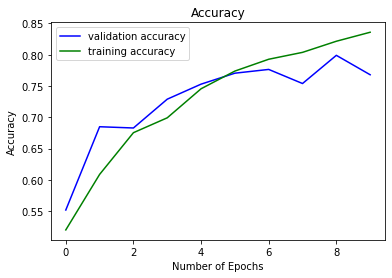

In [453]:
plt.plot(history_2.history['val_loss'], color='b', label="validation loss")
plt.plot(history_2.history['loss'], color='g', label="training loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history_2.history['val_accuracy'], color='b', label="validation accuracy")
plt.plot(history_2.history['accuracy'], color='g', label="training accuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<h2>Experiment 3</h2>

In [454]:
model_3 = Sequential()


model_3.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', 
                 activation ='relu', input_shape = (d,d,3)))

model_3.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', 
                 activation ='relu'))

model_3.add(MaxPool2D(pool_size=(2,2)))


model_3.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', 
                 activation ='relu'))
model_3.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', 
                 activation ='relu'))
model_3.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model_3.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', 
                 activation ='relu'))
model_3.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', 
                 activation ='relu'))
model_3.add(MaxPool2D(pool_size=(2,2)))
model_3.add(Dropout(0.2))



# fully connected
model_3.add(Flatten())

model_3.add(Dense(32, activation = "relu"))

model_3.add(Dense(1, activation = "sigmoid"))


# Define the optimizer
# lr = learning rate
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model_3.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

epochs = 10  # for better result increase the epochs
batch_size = 64

# Fit the model
history_3 = model_3.fit(X_train, Y_train, epochs = epochs, validation_data = (X_test,Y_test), batch_size=batch_size)

Epoch 1/10
125/125 [==============================] - 15s 124ms/step - loss: 0.6914 - accuracy: 0.5176 - val_loss: 0.6783 - val_accuracy: 0.5715
Epoch 2/10
125/125 [==============================] - 15s 119ms/step - loss: 0.6545 - accuracy: 0.6211 - val_loss: 0.6445 - val_accuracy: 0.6320
Epoch 3/10
125/125 [==============================] - 15s 120ms/step - loss: 0.6195 - accuracy: 0.6697 - val_loss: 0.5880 - val_accuracy: 0.6985
Epoch 4/10
125/125 [==============================] - 15s 122ms/step - loss: 0.5603 - accuracy: 0.7159 - val_loss: 0.5334 - val_accuracy: 0.7345
Epoch 5/10
125/125 [==============================] - 17s 137ms/step - loss: 0.5199 - accuracy: 0.7414 - val_loss: 0.5218 - val_accuracy: 0.7385
Epoch 6/10
125/125 [==============================] - 17s 134ms/step - loss: 0.4842 - accuracy: 0.7660 - val_loss: 0.4914 - val_accuracy: 0.7680
Epoch 7/10
125/125 [==============================] - 17s 139ms/step - loss: 0.4529 - accuracy: 0.7883 - val_loss: 0.4714 - val_ac

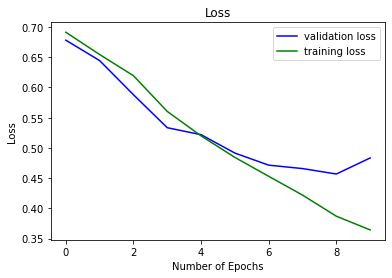

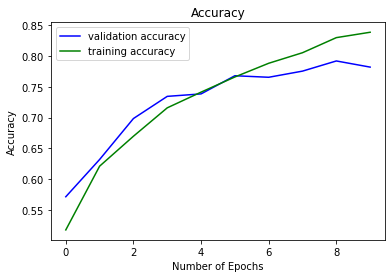

In [455]:
plt.plot(history_3.history['val_loss'], color='b', label="validation loss")
plt.plot(history_3.history['loss'], color='g', label="training loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history_3.history['val_accuracy'], color='b', label="validation accuracy")
plt.plot(history_3.history['accuracy'], color='g', label="training accuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<h2>Experiment4</h2>

In [458]:
model_4 = Sequential()


model_4.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', 
                 activation ='relu', input_shape = (d,d,3)))
model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.2))

model_4.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', 
                 activation ='relu'))

model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.2))

model_4.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', 
                 activation ='relu'))
model_4.add(MaxPool2D(pool_size=(2,2)))
model_4.add(Dropout(0.2))



# fully connected
model_4.add(Flatten())

model_4.add(Dense(512, activation = "relu"))

model_4.add(Dense(1, activation = "sigmoid"))


# Define the optimizer
# lr = learning rate
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model_4.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

epochs = 10  # for better result increase the epochs
batch_size = 128

# Fit the model
history_4 = model_4.fit(X_train, Y_train, epochs = epochs, validation_data = (X_test,Y_test), batch_size=batch_size)

Epoch 1/10
63/63 [==============================] - 6s 100ms/step - loss: 0.6945 - accuracy: 0.5304 - val_loss: 0.6839 - val_accuracy: 0.5230
Epoch 2/10
63/63 [==============================] - 6s 97ms/step - loss: 0.6564 - accuracy: 0.6064 - val_loss: 0.6432 - val_accuracy: 0.6540
Epoch 3/10
63/63 [==============================] - 6s 96ms/step - loss: 0.6005 - accuracy: 0.6829 - val_loss: 0.6036 - val_accuracy: 0.6705
Epoch 4/10
63/63 [==============================] - 6s 92ms/step - loss: 0.5720 - accuracy: 0.7013 - val_loss: 0.5641 - val_accuracy: 0.7085
Epoch 5/10
63/63 [==============================] - 6s 88ms/step - loss: 0.5419 - accuracy: 0.7244 - val_loss: 0.5949 - val_accuracy: 0.6800
Epoch 6/10
63/63 [==============================] - 6s 96ms/step - loss: 0.5270 - accuracy: 0.7369 - val_loss: 0.5075 - val_accuracy: 0.7550
Epoch 7/10
63/63 [==============================] - 6s 95ms/step - loss: 0.4920 - accuracy: 0.7663 - val_loss: 0.4940 - val_accuracy: 0.7585
Epoch 8/10
6

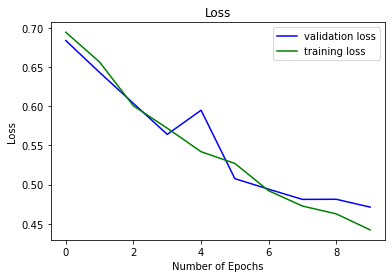

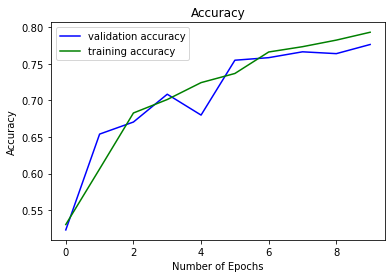

In [459]:
plt.plot(history_4.history['val_loss'], color='b', label="validation loss")
plt.plot(history_4.history['loss'], color='g', label="training loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history_4.history['val_accuracy'], color='b', label="validation accuracy")
plt.plot(history_4.history['accuracy'], color='g', label="training accuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<h2>Experiment 5</h2>

In [467]:
model_5 = Sequential()


model_5.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', 
                 activation ='relu', input_shape = (d,d,3)))
model_5.add(MaxPool2D(pool_size=(2,2)))
model_5.add(Dropout(0.25))

model_5.add(Conv2D(64,(3,3),activation='relu'))
model_5.add(MaxPool2D(pool_size=(2,2)))
model_5.add(Dropout(0.25))

model_5.add(Conv2D(128,(3,3),activation='relu'))
model_5.add(MaxPool2D(pool_size=(2,2)))
model_5.add(Dropout(0.25))

# fully connected
model_5.add(Flatten())

model_5.add(Dense(32, activation = "relu"))
model_5.add(Dense(64, activation = "relu"))

model_5.add(Dense(1, activation = "sigmoid"))


# Define the optimizer
# lr = learning rate
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model_5.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

epochs = 30  # for better result increase the epochs
batch_size = 64

# Fit the model
history_5 = model_5.fit(X_train, Y_train, epochs = epochs, validation_data = (X_test,Y_test), batch_size=batch_size)

Epoch 1/30
125/125 [==============================] - 4s 34ms/step - loss: 0.6922 - accuracy: 0.5155 - val_loss: 0.6853 - val_accuracy: 0.5810
Epoch 2/30
125/125 [==============================] - 4s 33ms/step - loss: 0.6636 - accuracy: 0.6054 - val_loss: 0.6688 - val_accuracy: 0.5935
Epoch 3/30
125/125 [==============================] - 4s 33ms/step - loss: 0.6317 - accuracy: 0.6438 - val_loss: 0.6086 - val_accuracy: 0.6655
Epoch 4/30
125/125 [==============================] - 4s 33ms/step - loss: 0.5983 - accuracy: 0.6777 - val_loss: 0.5676 - val_accuracy: 0.7100
Epoch 5/30
125/125 [==============================] - 4s 33ms/step - loss: 0.5539 - accuracy: 0.7125 - val_loss: 0.5638 - val_accuracy: 0.7150
Epoch 6/30
125/125 [==============================] - 4s 33ms/step - loss: 0.5344 - accuracy: 0.7354 - val_loss: 0.5349 - val_accuracy: 0.7280
Epoch 7/30
125/125 [==============================] - 4s 33ms/step - loss: 0.5116 - accuracy: 0.7483 - val_loss: 0.5050 - val_accuracy: 0.7575

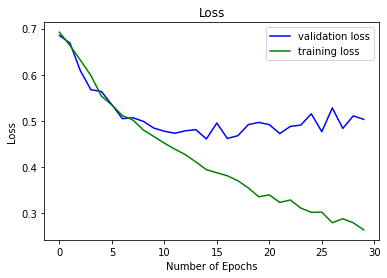

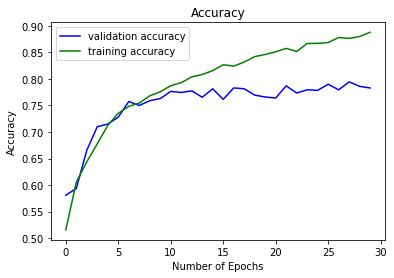

In [468]:
plt.plot(history_5.history['val_loss'], color='b', label="validation loss")
plt.plot(history_5.history['loss'], color='g', label="training loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history_5.history['val_accuracy'], color='b', label="validation accuracy")
plt.plot(history_5.history['accuracy'], color='g', label="training accuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<h2>Experiment 6</h2>

In [484]:
model_6 = Sequential()

model_6.add(Conv2D(filters = 32, kernel_size = (3,3),padding='same', 
                 activation ='relu', input_shape = (d,d,3)))

model_6.add(Conv2D(filters = 32, kernel_size = (3,3),padding='same', 
                 activation ='relu'))

model_6.add(MaxPool2D(pool_size=(2,2)))
model_6.add(Dropout(0.2))


model_6.add(Conv2D(filters = 64, kernel_size = (3,3),padding='same', 
                 activation ='relu'))
model_6.add(Conv2D(filters = 64, kernel_size = (3,3),padding='same', 
                 activation ='relu'))

model_6.add(MaxPool2D(pool_size=(2,2)))
model_6.add(Dropout(0.3))


model_6.add(Conv2D(filters = 128, kernel_size = (3,3),padding='same', 
                 activation ='relu'))
model_6.add(Conv2D(filters = 128, kernel_size = (3,3),padding='same', 
                 activation ='relu'))

model_6.add(MaxPool2D(pool_size=(2,2)))
model_6.add(Dropout(0.2))



# fully connected
model_6.add(Flatten())

model_6.add(Dense(32, activation = "relu"))

model_6.add(Dense(64, activation = "relu"))


model_6.add(Dense(1, activation = "sigmoid"))


# Define the optimizer
# lr = learning rate
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model_6.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

epochs = 20  # for better result increase the epochs
batch_size = 32

# Fit the model
history_6 = model_6.fit(X_train, Y_train, epochs = epochs, validation_data = (X_test,Y_test), batch_size=batch_size)

Epoch 1/20
250/250 [==============================] - 23s 90ms/step - loss: 0.6932 - accuracy: 0.5101 - val_loss: 0.6936 - val_accuracy: 0.5040
Epoch 2/20
250/250 [==============================] - 22s 89ms/step - loss: 0.6902 - accuracy: 0.5293 - val_loss: 0.6858 - val_accuracy: 0.5105
Epoch 3/20
250/250 [==============================] - 22s 87ms/step - loss: 0.6739 - accuracy: 0.5759 - val_loss: 0.6910 - val_accuracy: 0.5030
Epoch 4/20
250/250 [==============================] - 22s 87ms/step - loss: 0.6590 - accuracy: 0.6039 - val_loss: 0.6398 - val_accuracy: 0.6555
Epoch 5/20
250/250 [==============================] - 22s 87ms/step - loss: 0.6288 - accuracy: 0.6480 - val_loss: 0.5927 - val_accuracy: 0.6760
Epoch 6/20
250/250 [==============================] - 22s 87ms/step - loss: 0.5956 - accuracy: 0.6870 - val_loss: 0.5783 - val_accuracy: 0.7095
Epoch 7/20
250/250 [==============================] - 22s 87ms/step - loss: 0.5621 - accuracy: 0.7036 - val_loss: 0.5450 - val_accuracy:

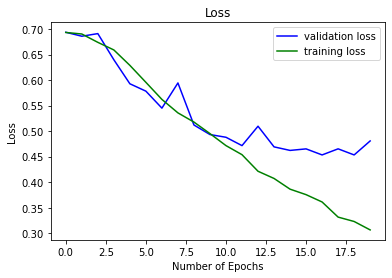

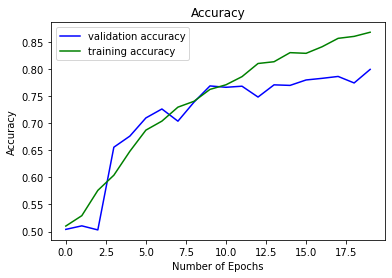

In [485]:
plt.plot(history_6.history['val_loss'], color='b', label="validation loss")
plt.plot(history_6.history['loss'], color='g', label="training loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history_6.history['val_accuracy'], color='b', label="validation accuracy")
plt.plot(history_6.history['accuracy'], color='g', label="training accuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<h2>Experiment 7</h2>

In [491]:
model_7 = Sequential()

model_7.add(Conv2D(filters = 32, kernel_size = (3,3),padding='same', 
                 activation ='relu', input_shape = (d,d,3)))

model_7.add(Conv2D(filters = 32, kernel_size = (3,3),padding='same', 
                 activation ='relu'))


model_7.add(Conv2D(filters = 64, kernel_size = (3,3),padding='same', 
                 activation ='relu'))
model_7.add(Conv2D(filters = 64, kernel_size = (3,3),padding='same', 
                 activation ='relu'))
model_7.add(MaxPool2D(pool_size=(2,2)))
model_7.add(Dropout(0.2))

model_7.add(Conv2D(filters = 128, kernel_size = (3,3),padding='same', 
                 activation ='relu'))
model_7.add(Conv2D(filters = 128, kernel_size = (3,3),padding='same', 
                 activation ='relu'))
model_7.add(MaxPool2D(pool_size=(2,2)))
model_7.add(Dropout(0.2))


# fully connected
model_7.add(Flatten())

model_7.add(Dense(32, activation = "relu"))
model_7.add(Dropout(0.2))

model_7.add(Dense(1, activation = "sigmoid"))


# Define the optimizer
# lr = learning rate
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model_7.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

epochs = 20  
batch_size = 64

# Fit the model
history_7 = model_7.fit(X_train, Y_train, epochs = epochs, validation_data = (X_test,Y_test), batch_size=batch_size)

Epoch 1/20
125/125 [==============================] - 33s 261ms/step - loss: 0.6935 - accuracy: 0.5034 - val_loss: 0.6927 - val_accuracy: 0.5015
Epoch 2/20
125/125 [==============================] - 34s 268ms/step - loss: 0.6850 - accuracy: 0.5515 - val_loss: 0.6686 - val_accuracy: 0.5925
Epoch 3/20
125/125 [==============================] - 34s 269ms/step - loss: 0.6616 - accuracy: 0.6083 - val_loss: 0.6442 - val_accuracy: 0.6480
Epoch 4/20
125/125 [==============================] - 34s 272ms/step - loss: 0.6468 - accuracy: 0.6283 - val_loss: 0.6319 - val_accuracy: 0.6525
Epoch 5/20
125/125 [==============================] - 63s 503ms/step - loss: 0.6184 - accuracy: 0.6668 - val_loss: 0.5894 - val_accuracy: 0.7065
Epoch 6/20
125/125 [==============================] - 47s 375ms/step - loss: 0.6036 - accuracy: 0.6812 - val_loss: 0.6106 - val_accuracy: 0.6755
Epoch 7/20
125/125 [==============================] - 47s 375ms/step - loss: 0.5907 - accuracy: 0.6904 - val_loss: 0.5628 - val_ac

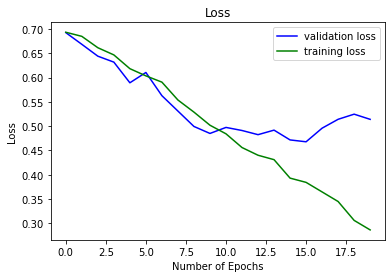

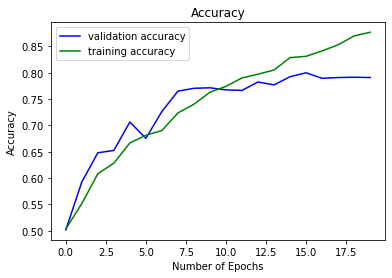

In [497]:
plt.plot(history_7.history['val_loss'], color='b', label="validation loss")
plt.plot(history_7.history['loss'], color='g', label="training loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history_7.history['val_accuracy'], color='b', label="validation accuracy")
plt.plot(history_7.history['accuracy'], color='g', label="training accuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<h2>Experiment 8</h2>

In [499]:
model_8 = Sequential()

model_8.add(Conv2D(filters = 32, kernel_size = (3,3),padding='same', 
                 activation ='relu', input_shape = (d,d,3)))
model_8.add(MaxPool2D(pool_size=(2,2)))
model_8.add(Dropout(0.25))


model_8.add(Conv2D(filters = 64, kernel_size = (3,3),padding='same', 
                 activation ='relu'))
model_8.add(MaxPool2D(pool_size=(2,2)))
model_8.add(Dropout(0.25))


model_8.add(Conv2D(filters = 128, kernel_size = (3,3),padding='same', 
                 activation ='relu'))
model_8.add(MaxPool2D(pool_size=(2,2)))
model_8.add(Dropout(0.25))



# fully connected
model_8.add(Flatten())

model_8.add(Dense(256, activation = "relu"))
model_8.add(Dropout(0.5))

model_8.add(Dense(1, activation = "sigmoid"))


# Define the optimizer
# lr = learning rate
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model_8.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

epochs = 20  
batch_size = 128

# Fit the model
history_8 = model_8.fit(X_train, Y_train, epochs = epochs, validation_data = (X_test,Y_test), batch_size=batch_size)

Epoch 1/20
63/63 [==============================] - 5s 87ms/step - loss: 0.6984 - accuracy: 0.5123 - val_loss: 0.6893 - val_accuracy: 0.5160
Epoch 2/20
63/63 [==============================] - 5s 84ms/step - loss: 0.6780 - accuracy: 0.5713 - val_loss: 0.6553 - val_accuracy: 0.6370
Epoch 3/20
63/63 [==============================] - 5s 84ms/step - loss: 0.6311 - accuracy: 0.6415 - val_loss: 0.6120 - val_accuracy: 0.6740
Epoch 4/20
63/63 [==============================] - 5s 85ms/step - loss: 0.6071 - accuracy: 0.6729 - val_loss: 0.5997 - val_accuracy: 0.6915
Epoch 5/20
63/63 [==============================] - 5s 86ms/step - loss: 0.5796 - accuracy: 0.6967 - val_loss: 0.5644 - val_accuracy: 0.7155
Epoch 6/20
63/63 [==============================] - 5s 84ms/step - loss: 0.5568 - accuracy: 0.7086 - val_loss: 0.5552 - val_accuracy: 0.7250
Epoch 7/20
63/63 [==============================] - 5s 84ms/step - loss: 0.5440 - accuracy: 0.7271 - val_loss: 0.5370 - val_accuracy: 0.7375
Epoch 8/20
63

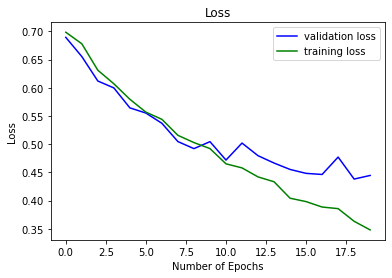

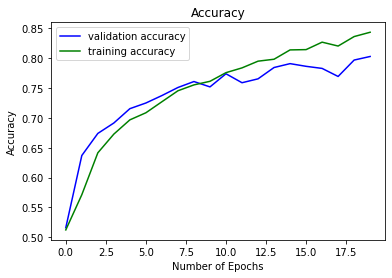

In [500]:
plt.plot(history_8.history['val_loss'], color='b', label="validation loss")
plt.plot(history_8.history['loss'], color='g', label="training loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history_8.history['val_accuracy'], color='b', label="validation accuracy")
plt.plot(history_8.history['accuracy'], color='g', label="training accuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<h2>Experiment 9</h2>

In [503]:
model_9 = Sequential()

model_9.add(Conv2D(filters = 32, kernel_size = (3,3),padding='same', 
                 activation ='relu', input_shape = (d,d,3)))
model_9.add(MaxPool2D(pool_size=(2,2)))
model_9.add(Dropout(0.25))


model_9.add(Conv2D(filters = 64, kernel_size = (3,3),padding='same', 
                 activation ='relu'))
model_9.add(MaxPool2D(pool_size=(2,2)))
model_9.add(Dropout(0.25))


model_9.add(Conv2D(filters = 128, kernel_size = (3,3),padding='same', 
                 activation ='relu'))
model_9.add(MaxPool2D(pool_size=(2,2)))
model_9.add(Dropout(0.25))

model_9.add(Conv2D(filters = 256, kernel_size = (3,3),padding='same', 
                 activation ='relu'))
model_9.add(MaxPool2D(pool_size=(2,2)))
model_9.add(Dropout(0.25))





# fully connected
model_9.add(Flatten())

model_9.add(Dense(256, activation = "relu"))
model_9.add(Dropout(0.5))

model_9.add(Dense(1, activation = "sigmoid"))


# Define the optimizer
# lr = learning rate
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model_9.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

epochs = 20  
batch_size = 128

# Fit the model
history_9 = model_9.fit(X_train, Y_train, epochs = epochs, validation_data = (X_test,Y_test), batch_size=batch_size)

Epoch 1/20
63/63 [==============================] - 7s 104ms/step - loss: 0.6934 - accuracy: 0.5194 - val_loss: 0.6839 - val_accuracy: 0.5710
Epoch 2/20
63/63 [==============================] - 7s 103ms/step - loss: 0.6553 - accuracy: 0.6110 - val_loss: 0.6206 - val_accuracy: 0.6575
Epoch 3/20
63/63 [==============================] - 7s 107ms/step - loss: 0.6089 - accuracy: 0.6660 - val_loss: 0.6218 - val_accuracy: 0.6590
Epoch 4/20
63/63 [==============================] - 6s 100ms/step - loss: 0.5797 - accuracy: 0.6957 - val_loss: 0.6141 - val_accuracy: 0.6685
Epoch 5/20
63/63 [==============================] - 7s 103ms/step - loss: 0.5710 - accuracy: 0.7032 - val_loss: 0.5752 - val_accuracy: 0.6910
Epoch 6/20
63/63 [==============================] - 6s 102ms/step - loss: 0.5446 - accuracy: 0.7270 - val_loss: 0.5477 - val_accuracy: 0.7225
Epoch 7/20
63/63 [==============================] - 6s 101ms/step - loss: 0.5295 - accuracy: 0.7376 - val_loss: 0.5202 - val_accuracy: 0.7480
Epoch 

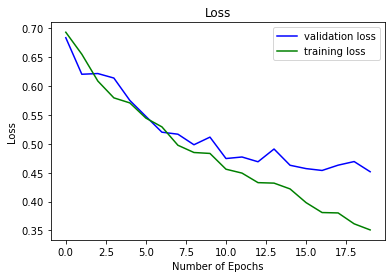

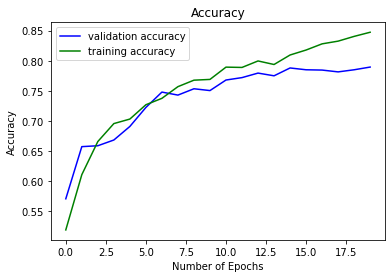

In [504]:
plt.plot(history_9.history['val_loss'], color='b', label="validation loss")
plt.plot(history_9.history['loss'], color='g', label="training loss")
plt.title("Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.plot(history_9.history['val_accuracy'], color='b', label="validation accuracy")
plt.plot(history_9.history['accuracy'], color='g', label="training accuracy")
plt.title("Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

<h2>Experiment 10</h2>

In [505]:
model_10 = Sequential()

model_10.add(Conv2D(filters = 32, kernel_size = (3,3),padding='same', 
                 activation ='relu', input_shape = (d,d,3)))
model_10.add(MaxPool2D(pool_size=(2,2)))
model_10.add(Dropout(0.25))


model_10.add(Conv2D(filters = 64, kernel_size = (3,3),padding='same', 
                 activation ='relu'))
model_10.add(MaxPool2D(pool_size=(2,2)))
model_10.add(Dropout(0.25))


model_10.add(Conv2D(filters = 128, kernel_size = (3,3),padding='same', 
                 activation ='relu'))
model_10.add(MaxPool2D(pool_size=(2,2)))
model_10.add(Dropout(0.25))



# fully connected
model_10.add(Flatten())

model_10.add(Dense(256, activation = "relu"))
model_10.add(Dropout(0.5))

model_10.add(Dense(1, activation = "sigmoid"))


# Define the optimizer
# lr = learning rate
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

# Compile the model
model_10.compile(optimizer = optimizer , loss = "binary_crossentropy", metrics=["accuracy"])

epochs = 30  
batch_size = 64

# Fit the model
history_10 = model_10.fit(X_train, Y_train, epochs = epochs, validation_data = (X_test,Y_test), batch_size=batch_size)

Epoch 1/30
125/125 [==============================] - 7s 54ms/step - loss: 0.6737 - accuracy: 0.5726 - val_loss: 0.6366 - val_accuracy: 0.6490
Epoch 2/30
125/125 [==============================] - 7s 53ms/step - loss: 0.6248 - accuracy: 0.6550 - val_loss: 0.5944 - val_accuracy: 0.6780
Epoch 3/30
125/125 [==============================] - 7s 53ms/step - loss: 0.5938 - accuracy: 0.6789 - val_loss: 0.5667 - val_accuracy: 0.7125
Epoch 4/30
125/125 [==============================] - 7s 54ms/step - loss: 0.5537 - accuracy: 0.7181 - val_loss: 0.5517 - val_accuracy: 0.7195
Epoch 5/30
125/125 [==============================] - 7s 53ms/step - loss: 0.5386 - accuracy: 0.7320 - val_loss: 0.5478 - val_accuracy: 0.7235
Epoch 6/30
125/125 [==============================] - 7s 53ms/step - loss: 0.5190 - accuracy: 0.7464 - val_loss: 0.5089 - val_accuracy: 0.7580
Epoch 7/30
125/125 [==============================] - 7s 53ms/step - loss: 0.4919 - accuracy: 0.7588 - val_loss: 0.5113 - val_accuracy: 0.7395

<h4>Note:</h4>
For experiment 10, the validation accuracy reaches 0.8146 but the training accuracy is 0.9005. The model did well on training set but poorly on validation set. As for experiment 8, the validation accuracy is 0.8030 and the training accuracy is 0.8436. So with several experiments, the model was able to reach around 80% validation accuracy.

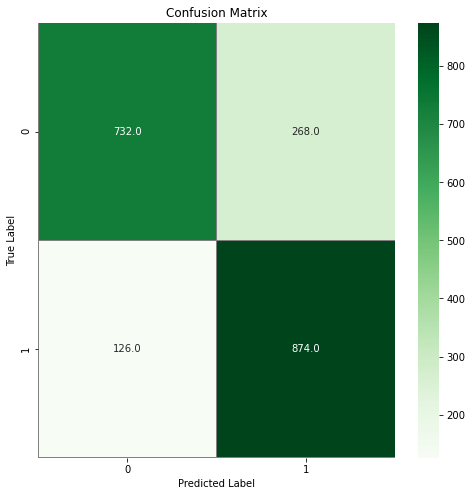

In [506]:
# confusion matrix
import seaborn as sns

# Predict the values from the validation dataset
Y_pred = model_8.predict_classes(X_test) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_test, Y_pred) 

# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

<h2>Predicting new cat and dog</h2>

rand_X_test_orig.shape:  (2, 32, 32, 3)


Predictions: 
[0 0]


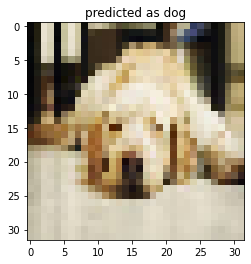

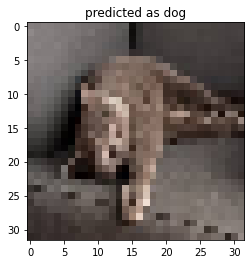

In [507]:
test_random_cat_path = data_dir +"/random_test_set/rand_cat.jpg"
test_random_dog_path = data_dir +"/random_test_set/rand_dog.jpg"

rand_X_test_orig = np.zeros((2, d, d, 3), dtype='float32') 

rand_dog_img = preprocessing.image.load_img(test_random_dog_path, target_size=(d, d))
rand_X_test_orig[0] = preprocessing.image.img_to_array(rand_dog_img)

rand_cat_img = preprocessing.image.load_img(test_random_cat_path, target_size=(d, d))
rand_X_test_orig[1] = preprocessing.image.img_to_array(rand_cat_img)


rand_X_test = rand_X_test_orig / 255.0

print("rand_X_test_orig.shape: ",rand_X_test_orig.shape)
print("\n")


Y_new_img = model_8.predict(rand_X_test) 
Y_new = np.argmax(Y_new_img, axis=1)
print("Predictions: ")
print(Y_new)

class_labels = ['dog', 'cat']

for i in range(2):
    plt.imshow(np.uint8(rand_X_test_orig[i]))
    plt.title("predicted as "+class_labels[int(Y_new[i])])
    plt.show()